# Preprocessing

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore

import librosa
from librosa import display, beat
from librosa.feature import chroma_stft, melspectrogram, tempogram
import glob 

from Preprocessing_functions import enhanced_chroma_parser, mfccs_parser, static_tempo
from beat_features import aggregated_feature_parser

import matplotlib.pyplot as plt

In [ ]:
def get_mfc(file, sample_rate=42000):
    
    try:
            
        y, sr = librosa.load(file, sr=sample_rate, res_type='kaiser_fast')

        # Let's make and display a mel-scaled power (energy-squared) spectrogram
        S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

        # Convert to log scale (dB). We'll use the peak power as reference.
        mfc = librosa.amplitude_to_db(S, ref=np.max)
        
    except:
        print("Error encountered while parsing file: ", file)
        return None, None

    
    return mfc

In [ ]:
np.ndarray.item()

In [4]:
dnb = r"D:\Music\DnB\beatjunkierato+dnbpanacea1hitfreedl.mp3"
agg_feat = aggregated_feature_parser(dnb)

In [5]:
agg_feat.shape

(38, 288)

In [9]:
dnb2 = r"D:\MusicSubset\DnB\chemicalmike+cspaceslowgrooveversion.mp3"
agg_feat2 =aggregated_feature_parser(dnb2).T

In [10]:
agg_feat2.shape

(609, 38)

In [13]:
y, sr = librosa.load(dnb, sr=42000, res_type='kaiser_fast')

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
 

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

In [47]:
  # here kaiser_fast is a technique used for faster extraction (though it does negatively affect quality)
X, sample_rate = librosa.load(dnb, sr=22050, res_type='kaiser_fast') 

  # we extract mfcc feature from data, Use the mean so that scale isn't an issue.
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

In [61]:
y, sr = librosa.load(dnb, sr=22050, res_type='kaiser_fast')

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=13)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S, ref=np.max)

In [64]:
np.mean(log_S.T, axis=0)

array([-25.258734, -41.539635, -45.762352, -51.549046, -56.81026 ,
       -61.157646, -65.29678 , -67.34011 , -69.54037 , -72.15127 ,
       -73.404434, -73.87062 , -76.39035 ], dtype=float32)

In [50]:
mfccs

array([-84.979576  , 102.94455   ,   5.2206306 ,  28.005772  ,
        -5.1882043 ,  16.352581  ,  -5.7582145 ,  15.065767  ,
        -7.130522  ,  13.303     ,  -5.6917176 ,   9.462082  ,
        -5.9359083 ,   6.2719502 ,  -4.8490763 ,   6.592454  ,
        -2.397795  ,   5.8598104 ,   0.845607  ,   5.7688217 ,
        -4.600078  ,   1.1007617 ,  -0.41334674,   2.8735158 ,
         0.289897  ,   1.8088484 ,  -2.5951734 ,  -0.9897421 ,
         0.6406841 ,   4.2590833 ,  -0.4048196 ,  -3.5896578 ,
        -2.6033149 ,   0.68578756,   0.6386425 ,   2.6688259 ,
         0.80839723,   0.15595505,  -2.7997332 ,  -2.432302  ],
      dtype=float32)

In [19]:
print(mfcc.shape)
print(mfcc_delta.shape)

(13, 8566)
(13, 8566)


In [70]:
mfcc_mean = np.mean(mfcc.T, axis=0)

In [72]:
mfcc_mean.shape

(13,)

(array([1., 0., 0., 0., 6., 4., 1., 0., 0., 1.]),
 array([-2.3670402 , -1.8771479 , -1.3872557 , -0.89736336, -0.4074711 ,
         0.08242118,  0.5723134 ,  1.0622057 ,  1.552098  ,  2.0419903 ,
         2.5318825 ], dtype=float32),
 <a list of 10 Patch objects>)

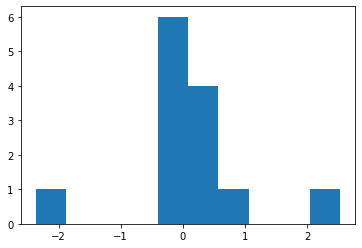

In [78]:
plt.hist(zscore(mfcc_mean))

In [83]:
np.mean(zscore(mfcc.T).T, axis=0).shape

(8566,)

In [86]:
np.mean(zscore(mfcc).T, axis=0)

array([-1.6145606 ,  2.314414  , -0.10731305,  0.5917635 , -0.38795337,
        0.30565035, -0.3838371 ,  0.25579742, -0.43627027,  0.17876823,
       -0.39318684,  0.0811035 , -0.40437046], dtype=float32)

(array([1., 0., 0., 0., 6., 4., 1., 0., 0., 1.]),
 array([-0.19725335, -0.156429  , -0.11560464, -0.07478028, -0.03395592,
         0.00686843,  0.04769278,  0.08851714,  0.1293415 ,  0.17016585,
         0.2109902 ], dtype=float32),
 <a list of 10 Patch objects>)

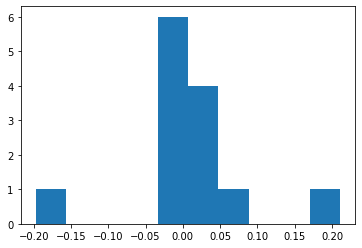

In [95]:
plt.hist(zscore(mfcc_mean)/12)

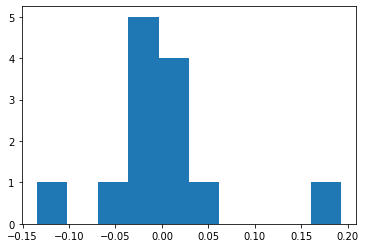

In [97]:
plt.hist(np.mean(zscore(mfcc).T, axis=0)/12);

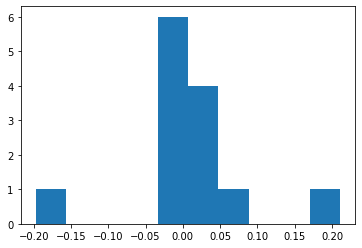

In [96]:
plt.hist(zscore(mfcc_mean)/12);

In [8]:
beat_features = np.empty((38,))
for files in glob.glob("D:\MusicSubset\*\*.mp3"):
    beat_features = np.vstack((beat_features, aggregated_feature_parser(files)))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 38 and the array at index 1 has size 353

In [ ]:
np.savetxt('subset_mfccs.npy', mfccs, delimiter=',')